# 5. Model Evaluation

Description

In [1]:
# Importing libraries

import os
from pathlib import Path
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as pt
from scipy.stats import ttest_ind

In [2]:
# Changing the directory to the project folder

os.chdir(Path(os.path.realpath("")).resolve().parents[1])

In [3]:
# Importing modules that fetch data

from src.getter.load_application_and_opportunity import get_processed_data

# Gathering data, Renaming columns and coalescing the data 
hstack_data, vstack_data = [], []

for u_id in ['w2v', 'bert', 'dbert']:
    cosine_sim_data_hstack = get_processed_data("cosine_similarity_" + u_id + "_hstack")
    cosine_sim_data_vstack = get_processed_data("cosine_similarity_" + u_id + "_vstack")

    # Renaming columns
    hstack_data.append(cosine_sim_data_hstack.rename(columns = {'row_similarity':'row_similarity_' + u_id}))
    vstack_data.append(cosine_sim_data_vstack.rename(columns = {'row_similarity':'row_similarity_' + u_id}))

# Merging data stack
    
cosine_sim_data_hstack = hstack_data[0].merge(
    hstack_data[1].merge(
        hstack_data[2], 
        left_on = ['OpportunityId', 'ApplicationId'], 
        right_on = ['OpportunityId', 'ApplicationId']
    ), 
    left_on = ['OpportunityId', 'ApplicationId'], 
    right_on = ['OpportunityId', 'ApplicationId']
)

cosine_sim_data_vstack = vstack_data[0].merge(
    vstack_data[1].merge(
        vstack_data[2], 
        left_on = ['OpportunityId', 'ApplicationId'], 
        right_on = ['OpportunityId', 'ApplicationId']
    ), 
    left_on = ['OpportunityId', 'ApplicationId'], 
    right_on = ['OpportunityId', 'ApplicationId']
)

In [4]:
cosine_sim_data_hstack.columns

Index(['OpportunityId', 'ApplicationId', 'row_similarity_w2v',
       'row_similarity_bert', 'row_similarity_dbert'],
      dtype='object')

In [5]:
# Getting mean values of the cosine similarities
for u_id in ['w2v', 'bert', 'dbert']:
    print(
        "=" * 10 + "H Stacked - Cosine Similarity Parameters" + "=" * 10 + "\n",
        f"{u_id} mean : ",
        np.round(cosine_sim_data_hstack['row_similarity_' + u_id].mean(), 4),
        f"{u_id} SD : ",
        np.round(cosine_sim_data_hstack['row_similarity_' + u_id].std(), 4),
        f"{u_id} variance : ",
        np.round(cosine_sim_data_hstack['row_similarity_' + u_id].var(), 4)
    )

print("\n")

for u_id in ['w2v', 'bert', 'dbert']:
    print(
        "=" * 10 + "V Stacked - Cosine Similarity Parameters" + "=" * 10 + "\n",
        f"{u_id} mean : ",
        np.round(cosine_sim_data_vstack['row_similarity_' + u_id].mean(), 4),
        f"{u_id} SD : ",
        np.round(cosine_sim_data_vstack['row_similarity_' + u_id].std(), 4),
        f"{u_id} variance : ",
        np.round(cosine_sim_data_vstack['row_similarity_' + u_id].var(), 4)
    )

==========H Stacked - Cosine Similarity Parameters==========
 w2v mean :  -0.0014 w2v SD :  0.0143 w2v variance :  0.0002
==========H Stacked - Cosine Similarity Parameters==========
 bert mean :  -0.001 bert SD :  0.0134 bert variance :  0.0002
==========H Stacked - Cosine Similarity Parameters==========
 dbert mean :  -0.0012 dbert SD :  0.0124 dbert variance :  0.0002


==========V Stacked - Cosine Similarity Parameters==========
 w2v mean :  -0.0032 w2v SD :  0.0277 w2v variance :  0.0008
==========V Stacked - Cosine Similarity Parameters==========
 bert mean :  -0.0013 bert SD :  0.0239 bert variance :  0.0006
==========V Stacked - Cosine Similarity Parameters==========
 dbert mean :  -0.0013 dbert SD :  0.0238 dbert variance :  0.0006


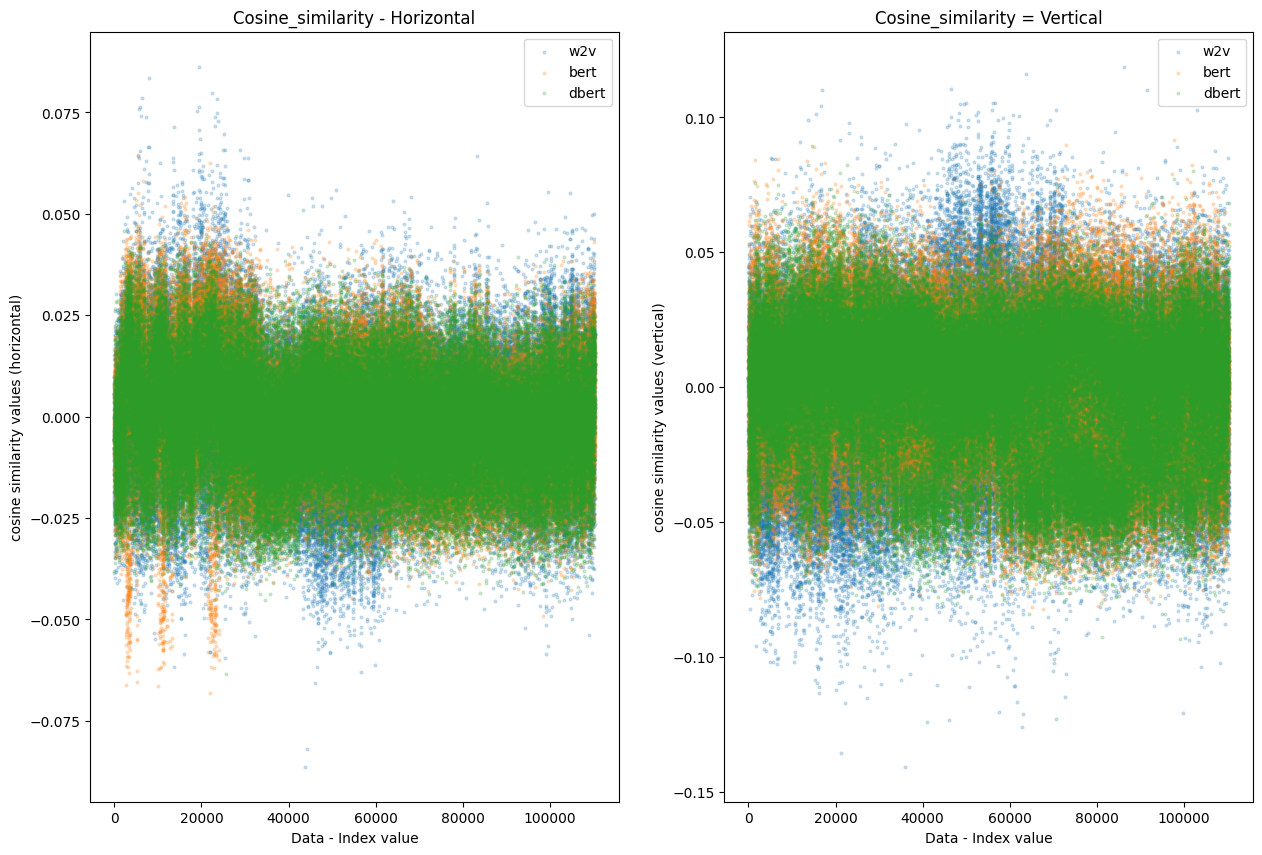

In [6]:
# Plotting horizontal cosine_similarities - scatter plot

fig, axis = pt.subplots(nrows=1, ncols=2, figsize=(15, 10))

for u_id in ['w2v', 'bert', 'dbert']:
    axis[0].scatter(
        range(len(cosine_sim_data_hstack)),
        cosine_sim_data_hstack['row_similarity_' + u_id],
        label = u_id,
        alpha = 0.2,
        s = 4,
    )

axis[0].set_title("Cosine_similarity - Horizontal")
axis[0].set_xlabel("Data - Index value")
axis[0].set_ylabel("cosine similarity values (horizontal)")
axis[0].legend()

for u_id in ['w2v', 'bert', 'dbert']:
    axis[1].scatter(
        range(len(cosine_sim_data_vstack)),
        cosine_sim_data_vstack['row_similarity_' + u_id],
        label = u_id,
        alpha = 0.2,
        s=4,
    )

axis[1].set_title("Cosine_similarity = Vertical")
axis[1].set_xlabel("Data - Index value")
axis[1].set_ylabel("cosine similarity values (vertical)")
axis[1].legend()
pt.show()

In [7]:
m = [('row_similarity_' + x ) for x in ['w2v', 'bert', 'dbert']]
m

['row_similarity_w2v', 'row_similarity_bert', 'row_similarity_dbert']

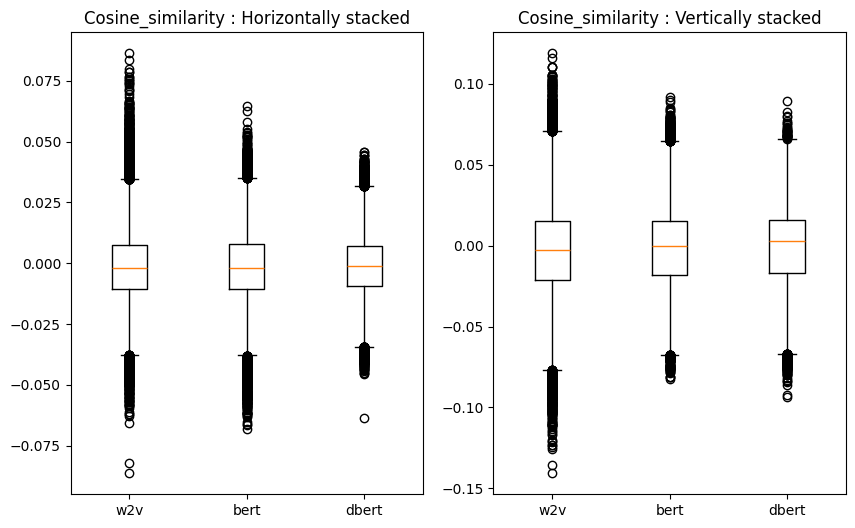

In [8]:
# Plotting horizontal cosine_similarities - box plot

fig, axis = pt.subplots(nrows=1, ncols=2, figsize=(10, 6))

axis[0].boxplot([cosine_sim_data_hstack['row_similarity_w2v'], cosine_sim_data_hstack['row_similarity_bert'], cosine_sim_data_hstack['row_similarity_dbert']],
                 positions = [1,2,3], labels = ['w2v', 'bert', 'dbert'])
axis[0].set_title("Cosine_similarity : Horizontally stacked")

axis[1].boxplot([cosine_sim_data_vstack['row_similarity_w2v'], cosine_sim_data_vstack['row_similarity_bert'], cosine_sim_data_vstack['row_similarity_dbert']], 
                positions = [1,2,3], labels = ['w2v', 'bert', 'dbert'])
axis[1].set_title("Cosine_similarity : Vertically stacked")

pt.show()

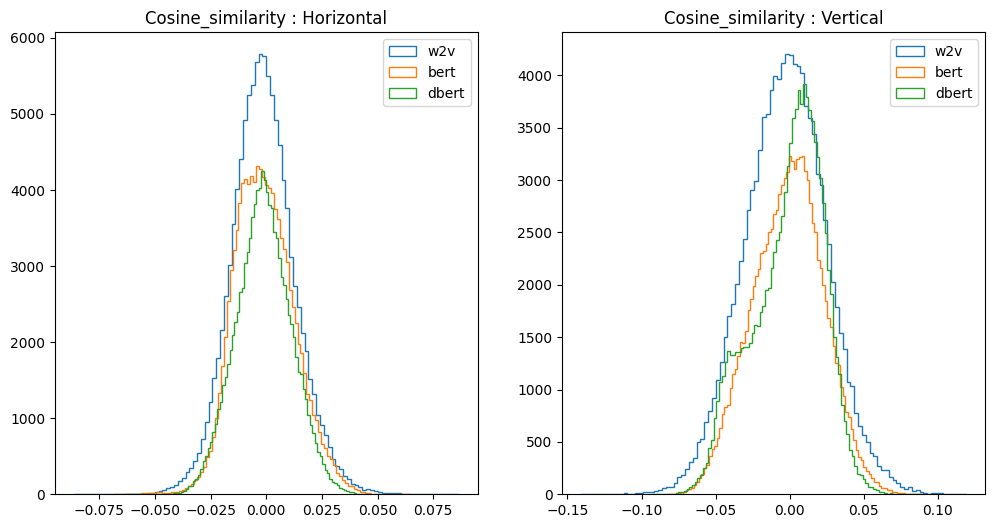

In [9]:
# Plotting horizontal cosine_similarities - histogram

fig, axis = pt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for u_id in ['w2v', 'bert', 'dbert']:
    axis[0].hist(cosine_sim_data_hstack['row_similarity_' + u_id], bins=100, histtype="step", label = u_id)

axis[0].set_title("Cosine_similarity : Horizontal")
axis[0].legend()


for u_id in ['w2v', 'bert', 'dbert']:
    axis[1].hist(cosine_sim_data_vstack['row_similarity_' + u_id], bins=100, histtype="step", label = u_id)

axis[1].set_title("Cosine_similarity : Vertical")
axis[1].legend()

pt.show()

In [10]:
# Conducting t-test to check the closeness of the means

ttest_w2v_bert = ttest_ind(
    cosine_sim_data_hstack.row_similarity_w2v,
    cosine_sim_data_hstack.row_similarity_bert,
)

print(f"t-test statistic w2v v/s bert - hstack = {ttest_w2v_bert}")

ttest_w2v_dbert = ttest_ind(
    cosine_sim_data_hstack.row_similarity_w2v, 
    cosine_sim_data_hstack.row_similarity_dbert
)
print(f"t-test statistic w2v v/s dbert - hstack = {ttest_w2v_dbert}")

ttest_bert_dbert = ttest_ind(
    cosine_sim_data_hstack.row_similarity_bert, 
    cosine_sim_data_hstack.row_similarity_dbert
)
print(f"t-test statistic bert v/s dbert - hstack = {ttest_bert_dbert}")

# Conducting t-test to check the closeness of the means - vstack
print("*"*40, '\n')
ttest_w2v_bert = ttest_ind(
    cosine_sim_data_vstack.row_similarity_w2v,
    cosine_sim_data_vstack.row_similarity_bert,
)

print(f"t-test statistic w2v v/s bert - vstack = {ttest_w2v_bert}")

ttest_w2v_dbert = ttest_ind(
    cosine_sim_data_vstack.row_similarity_w2v, 
    cosine_sim_data_vstack.row_similarity_dbert
)
print(f"t-test statistic w2v v/s dbert - vstack = {ttest_w2v_dbert}")

ttest_bert_dbert = ttest_ind(
    cosine_sim_data_vstack.row_similarity_bert, 
    cosine_sim_data_vstack.row_similarity_dbert
)
print(f"t-test statistic bert v/s dbert - vstack = {ttest_bert_dbert}")

t-test statistic w2v v/s bert - hstack = TtestResult(statistic=-7.066673674787525, pvalue=1.59158583045519e-12, df=220532.0)
t-test statistic w2v v/s dbert - hstack = TtestResult(statistic=-3.237382131390045, pvalue=0.0012064957395445156, df=220532.0)
t-test statistic bert v/s dbert - hstack = TtestResult(statistic=4.218618581808406, pvalue=2.4590168150179642e-05, df=220532.0)
**************************************** 

t-test statistic w2v v/s bert - vstack = TtestResult(statistic=-16.729282508688648, pvalue=8.769425298276218e-63, df=220532.0)
t-test statistic w2v v/s dbert - vstack = TtestResult(statistic=-17.15871316232569, pvalue=5.971973064588472e-66, df=220532.0)
t-test statistic bert v/s dbert - vstack = TtestResult(statistic=-0.42194635092604904, pvalue=0.6730645882200325, df=220532.0)


A very low p-values in all of the cases suggest that there is no coherence with amongst the vectors generated. this is possibly due to the horizontally stacking of the vectors and using PCA to reduce the dimensionality. 